# 📖 Introducción

La estadística inferencial se encarga de sacar conclusiones sobre una población (o modelo probabilístico) a partir de datos muestrales. Dos de los pilares son:

- **Estimación**: construir estimadores para parámetros desconocidos (p. ej. media, varianza, proporción, parámetros de una distribución) y estudiar sus propiedades (insesgadez, consistencia, eficiencia).
- **Intervalos de confianza**: construir rangos que contengan al parámetro con una probabilidad (nivel de confianza) determinada en repetición de experimentos.

Este notebook ofrece una exposición matemática clara y ejemplos prácticos para que puedas ejecutar y experimentar en Visual Studio Code (usar la extensión de Jupyter y abrir este archivo como Notebook).

## 🎯 Objetivo

1. Definir y ejemplificar métodos de construcción de estimadores: **método de momentos** y **máxima verosimilitud (MLE)**.
2. Describir y demostrar las propiedades fundamentales de los estimadores: **insesgadez**, **consistencia**, **eficiencia** (incluyendo CRLB y información de Fisher), y **asintoticidad**.
3. Construir y explicar los principales tipos de **intervalos de confianza**: para medias (z y t), proporciones, varianzas (chi-cuadrado) y métodos no paramétricos como bootstrap.
4. Proporcionar ejemplos resueltos en LaTeX ("a mano") y en Python reproducible; incluir simulaciones que ilustren sesgo, varianza, convergencia y cobertura de intervalos.

---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# 1. Estimadores y sus propiedades.

La inferencia estadística es una rama fundamental de la estadística que se encarga de extraer conclusiones sobre una población a partir de información contenida en una muestra.  
Su objetivo principal es proporcionar herramientas para **estimar parámetros poblacionales** y **tomar decisiones** en condiciones de incertidumbre.

En este contexto, surge el concepto de **estimador**, que es una función de los datos muestrales empleada para aproximar parámetros desconocidos de la población.  
La calidad de un estimador depende de ciertas propiedades deseables que garantizan su validez y utilidad.


## Estimadores

Un **estimador** es una regla o función que asigna un valor numérico a cada muestra, con la finalidad de aproximar un parámetro poblacional desconocido.  
Por ejemplo:  
- El promedio muestral $\bar{X}$ se usa como estimador de la media poblacional $\mu$.  
- La varianza muestral $S^2$ se utiliza para estimar la varianza poblacional $\sigma^2$.

Formalmente, si $\theta$ es un parámetro poblacional y $T(X_1, X_2, \dots, X_n)$ es una función de los datos, entonces $T$ se denomina **estimador de $\theta$**.

## Métodos para construir estimadores.

Existen diferentes métodos para construir estimadores a partir de los datos. Los más comunes son:

### 1. Método de Momentos (MM)

El **Método de Momentos** consiste en igualar los **momentos poblacionales teóricos** con los **momentos muestrales observados** para obtener los valores estimados de los parámetros.

Si $X$ es una variable aleatoria con $E[X]=\mu$

Es el n-ésimo momentos de X:
$$=E[X^{n}]$$

Muestrales:

$$M_{n} = \frac{1}{n} \sum_{i=1}^{k} x_{i}^{n}$$


#### Procedimiento:
1. Calcular los momentos teóricos de la distribución (en función de los parámetros).  
2. Calcular los momentos muestrales a partir de los datos:  
   $$
   m_k = \frac{1}{n}\sum_{i=1}^n X_i^k
   $$
3. Igualar $m_k$ con el momento teórico correspondiente.  
4. Resolver el sistema de ecuaciones para encontrar los estimadores de los parámetros.

#### Ejemplo:
Si $X \sim \text{Poisson}(\lambda)$, sabemos que $\mathbb{E}[X] = \lambda$.  
El primer momento muestral es $\bar{X}$, por lo tanto:  
$$
\hat{\lambda}_{MM} = \bar{X}
$$


### 2. Método de Máxima Verosimilitud (EMV)

El **Estimador de Máxima Verosimilitud (MLE)** busca los valores de los parámetros que **maximizan la probabilidad de observar los datos muestrales**.  

Sea $x_{1},x_{2},x_{2},\dots,x_{n} \rightarrow f(x;\theta)$ donde es la función de densidad y $\theta$ es el valor desconocido o a estimar.

#### Procedimiento:
1. Definir la **función de verosimilitud**:
   $$
   L(\theta) = \prod_{i=1}^n f(x_i ; \theta)
   $$
   donde $f(x_i ; \theta)$ es la función de densidad o de probabilidad.

2. Calcular el **logaritmo de la verosimilitud** (log-verosimilitud):
   $$
   \ell(\theta) = \ln L(\theta)
   $$
   (esto facilita los cálculos).

3. Derivar $\ell(\theta)$ respecto al parámetro y resolver:
   $$
   \frac{\partial \ell(\theta)}{\partial \theta} = 0
   $$
4. El valor de $\theta$ que maximiza $\ell(\theta)$ es el estimador de máxima verosimilitud.


#### Ejemplo:
Si $X \sim \text{Bernoulli}(p)$ con datos $x_1, x_2, \dots, x_n$, la función de verosimilitud es:  
$$
L(p) = \prod_{i=1}^n p^{x_i}(1-p)^{1-x_i}
$$
El logaritmo es:
$$
\ell(p) = \sum_{i=1}^n \left[ x_i \ln(p) + (1-x_i)\ln(1-p) \right]
$$
Derivando e igualando a cero:
$$
\hat{p}_{EMV} = \bar{X}
$$

## Propiedades de los Estimadores

### 1. Insesgadez
Un estimador $\hat{\theta}$ es **insesgado** si su valor esperado coincide con el parámetro poblacional:  
$$
\mathbb{E}[\hat{\theta}] = \theta
$$

### 2. Consistencia
Un estimador es **consistente** si converge en probabilidad al verdadero valor del parámetro conforme $n \to \infty$:  
$$
\hat{\theta}_n \xrightarrow{p} \theta
$$

### 3. Eficiencia
Un estimador es **eficiente** si, entre los insesgados, tiene la menor varianza posible.  
La eficiencia implica mayor precisión en las estimaciones.


Algunos ejercicios donde se cumplen las própiedades anteriores son los siguientes:

### Ejercicio 1 Normal con varianza conocida (μ desconocida)

**Planteamiento.**  
Sea $(X_1,\dots,X_n)$ i.i.d. $(\sim N(\mu,\sigma^2))$ con $(\sigma^2$) conocida. Estime $(\mu)$ por EMV y analice insesgadez, consistencia y eficiencia.

### Solución

1. **Verosimilitud.**  

   La densidad de una observación es
   $$
   f(x_i;\mu)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\Big(-\frac{(x_i-\mu)^2}{2\sigma^2}\Big).
   $$
   La verosimilitud total:
   $$
   L(\mu)=\prod_{i=1}^n f(x_i;\mu)
   $$
   y la log-verosimilitud:
   $$
   \ell(\mu) = -\frac{n}{2}\ln(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i-\mu)^2.
   $$
   Derivando respecto de \(\mu\) e igualando a cero:
   $$
   \frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^n (x_i-\mu) = 0
   \quad\Rightarrow\quad \hat\mu_{MLE}=\bar X=\frac{1}{n}\sum_{i=1}^n X_i.
   $$

2. **Insesgadez.**  

   $(\mathbb{E}[\bar X]=\mu)$. Luego $(\hat\mu_{EMV})$ es insesgado.

3. **Varianza.**  
   $$(\operatorname{Var}(\bar X)=\sigma^2/n).$$

4. **Consistencia.**  
   Por la Ley de los Grandes Números, $$(\bar X \xrightarrow{p} \mu).$$ Entonces es consistente.

5. **Eficiencia.**  
   La información de Fisher para $(\mu)$ es
   $$
   I(\mu)= -\mathbb{E}\left[\frac{\partial^2 \ell}{\partial\mu^2}\right] = \frac{n}{\sigma^2}.
   $$
   La cota de Rao-Cramér da
   $$
   \operatorname{Var}(\hat\mu)\ge \frac{1}{I(\mu)} = \frac{\sigma^2}{n}.
   $$
   Como $(\operatorname{Var}(\bar X)=\sigma^2/n)$, el estimador $(\bar X)$ **logra la cota** y por tanto es **eficiente**.

**Conclusión:** $(\hat\mu_{EMV}=\bar X)$ es insesgado, consistente y eficiente.




### Ejercicio 2 Bernoulli (estimación de \(p\))

**Planteamiento.**  
Sea $(X_1,\dots,X_n)$ i.i.d. $(\sim \mathrm{Bernoulli}(p)).$ Obtener EMV y comprobar propiedades.

### Solución

1. **Verosimilitud.** 

   La probabilidad de una observación es $(P(X_i=x_i)=p^{x_i}(1-p)^{1-x_i}).$  
   La verosimilitud:
   $$
   L(p)=\prod_{i=1}^n p^{x_i}(1-p)^{1-x_i} = p^{\sum x_i}(1-p)^{n-\sum x_i}.
   $$
   Log-verosimilitud:
   $$
   \ell(p)=\sum_{i=1}^n x_i\ln p + (n-\sum x_i)\ln(1-p).
   $$
   Derivando:
   $$
   \frac{d\ell}{dp} = \frac{\sum x_i}{p} - \frac{n-\sum x_i}{1-p}=0
   $$
   $$
   \Rightarrow \hat p_{MLE} = \frac{1}{n}\sum_{i=1}^n X_i = \bar X.
   $$

2. **Insesgadez.**  

   $(\mathbb{E}[\bar X] = p).$ Por tanto $(\hat p_{EMV})$ es insesgado.

3. **Varianza.**  

   $(\operatorname{Var}(\hat p)=\operatorname{Var}(\bar X)=\frac{p(1-p)}{n}).$

4. **Consistencia.**  

   Por la Ley de los Grandes Números, $(\bar X \xrightarrow{p} p).$ Es consistente.

5. **Eficiencia.**

   Información de Fisher:
   $$
   I(p) = n\cdot \frac{1}{p(1-p)}.
   $$
   $$
   \operatorname{Var}(\hat p) \ge \frac{1}{I(p)} = \frac{p(1-p)}{n}.
   $$
   La varianza de $(\hat p)$ coincide con la cota, por tanto $(\hat p_{EMV}=\bar X)$ es **eficiente**.

**Conclusión:** $(\hat p_{EMV}=\bar X)$ es insesgado, consistente y eficiente.



### Ejercicio 3 Exponencial (estimación de la tasa $(\lambda))$

**Planteamiento.**

Sea $(X_1,\dots,X_n)$ i.i.d. con densidad exponencial
$$
f(x;\lambda)=\lambda e^{-\lambda x},\quad x\ge 0,\ \lambda>0.
$$
Encontrar el EMV de $(\lambda)$ y el estimador por Método de Momentos; analizar insesgadez, consistencia y eficiencia.

### Solución

1. **EMV.**  

   Verosimilitud:
   $$
   L(\lambda)=\prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum x_i}.
   $$
   Log-verosimilitud:
   $$
   \ell(\lambda)= n\ln\lambda - \lambda \sum_{i=1}^n x_i.
   $$
   Derivando e igualando a cero:
   $$
   \frac{d\ell}{d\lambda}=\frac{n}{\lambda} - \sum_{i=1}^n x_i = 0
   \quad\Rightarrow\quad \hat\lambda_{MLE} = \frac{n}{\sum_{i=1}^n X_i} = \frac{1}{\bar X}.
   $$

2. **Método de Momentos (MM).**  

   Para la exponencial $(\mathbb{E}[X]=1/\lambda).$ Igualando con la media muestral:
   $$
   \frac{1}{\lambda} \approx \bar X \quad\Rightarrow\quad \hat\lambda_{MM} = \frac{1}{\bar X}.
   $$
   Observación: en este caso MM y EMV coinciden $(ambos = (1/\bar X)).$

3. **Insesgadez de $(\hat\lambda_{EMV})$.**  

   No es insesgado en general. Para ver esto, usaremos propiedades de la suma. Sea $(S=\sum_{i=1}^n X_i).$ Para $(X_i\sim \text{Exp}(\lambda))$, $(S\sim \Gamma(n,\text{rate}=\lambda))$. Con $( \hat\lambda_{MLE} = n/S)$, tenemos (para $(n>1)$):
   $$
   \mathbb{E}\left[\frac{1}{S}\right] = \frac{\lambda}{n-1}
   \quad\Rightarrow\quad
   \mathbb{E}[\hat\lambda_{MLE}] = n\cdot \mathbb{E}\left[\frac{1}{S}\right] = \frac{n\lambda}{n-1}.
   $$
   Luego $(\mathbb{E}[\hat\lambda_{MLE}] \ne \lambda):$ **$(\hat\lambda_{EMV})$ está sesgado** (sesgo positivo).  
   Un estimador insesgado basado en $(S)$ es
   $$
   \tilde\lambda = \frac{n-1}{S},
   $$
   porque $(\mathbb{E}[\tilde\lambda] = (n-1)\mathbb{E}[1/S] = \lambda).$

4. **Varianza exacta de \(\hat\lambda_{MLE}\).**  

   Para $(n>2)$,
   $$
   \mathbb{E}\left[\frac{1}{S^2}\right] = \frac{\lambda^2}{(n-2)(n-1)}.
   $$
   Entonces (calculando \(\operatorname{Var}(n/S)\)):
   $$
   \operatorname{Var}(\hat\lambda_{MLE}) = n^2\left(\mathbb{E}\Big[\frac{1}{S^2}\Big] - \Big(\mathbb{E}\Big[\frac{1}{S}\Big]\Big)^2\right)
   = \lambda^2 \frac{n^2}{(n-2)(n-1)^2}.
   $$

5. **Consistencia.**  

   Por la Ley de los Grandes Números, $(\bar X \xrightarrow{p} 1/\lambda)$. Entonces $(\hat\lambda_{EMV} = 1/\bar X \xrightarrow{p} \lambda)$. Es consistente (aunque sesgado para finite n).

6. **Eficiencia y comparación.**  

   Información de Fisher para $(\lambda)$ (por observación):
   $$
   I(\lambda) = -\mathbb{E}\Big[\frac{\partial^2}{\partial\lambda^2}\ell(\lambda)\Big] = \frac{n}{\lambda^2}.
   $$
   $$
   \operatorname{Var}(\hat\lambda) \ge \frac{1}{I(\lambda)} = \frac{\lambda^2}{n}.
   $$
   Comparando con la varianza exacta de $(\hat\lambda_{EMV})$:
   $$
   \operatorname{Var}(\hat\lambda_{EMV}) = \lambda^2 \frac{n^2}{(n-2)(n-1)^2}.
   $$
   Para $(n)$ grande, se puede comprobar que
   $$
   \operatorname{Var}(\hat\lambda_{EMV}) \sim \frac{\lambda^2}{n},
   $$
   es decir, **asintóticamente** el EMV alcanza la cota y por tanto es **asintóticamente eficiente**. Para muestras pequeñas el EMV no alcanza la consistencia y además es sesgado; el corregido $(\tilde\lambda=(n-1)/S)$ es insesgado pero tiene varianza ligeramente distinta.

**Conclusión:** $(\hat\lambda_{EMV}=1/\bar X)$ coincide con MM, es consistente y asintóticamente eficiente, pero está sesgado para muestras finitas (se puede usar $((n-1)/S)$ para obtener insesgadez).


Ahora a continuación algunos ejemplos en Python

Media de los estimadores: 5.002280309041303
Varianza empírica de los estimadores: 0.081554468858688
Varianza teórica: 0.08


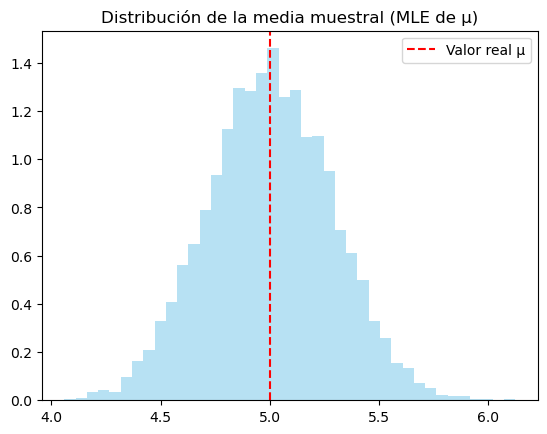

In [1]:
# ============================================
# Ejercicio 1: Estimación de la media en Normal
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# Parámetros poblacionales
mu, sigma = 5, 2   # N(mu, sigma^2)
n = 50             # tamaño de muestra
Nsim = 10000       # simulaciones

# Simulaciones de muestras y cálculo del estimador (media muestral)
estimates = []
for _ in range(Nsim):
    sample = np.random.normal(mu, sigma, n)
    estimates.append(np.mean(sample))
estimates = np.array(estimates)

print("Media de los estimadores:", np.mean(estimates))
print("Varianza empírica de los estimadores:", np.var(estimates))
print("Varianza teórica:", sigma**2 / n)

# Visualización
plt.hist(estimates, bins=40, density=True, alpha=0.6, color="skyblue")
plt.axvline(mu, color="red", linestyle="dashed", label="Valor real μ")
plt.title("Distribución de la media muestral (MLE de μ)")
plt.legend()
plt.show()


Media de los estimadores: 0.29961750000000004
Varianza empírica: 0.005325416193749999
Varianza teórica: 0.0052499999999999995


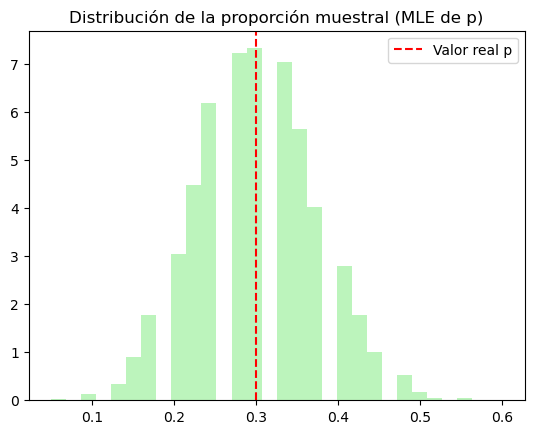

In [2]:
# ============================================
# Ejercicio 2: Bernoulli (estimación de p)
# ============================================

p = 0.3
n = 40
Nsim = 10000

estimates = []
for _ in range(Nsim):
    sample = np.random.binomial(1, p, n)
    estimates.append(np.mean(sample))   # MLE de p
estimates = np.array(estimates)

print("Media de los estimadores:", np.mean(estimates))
print("Varianza empírica:", np.var(estimates))
print("Varianza teórica:", p*(1-p)/n)

plt.hist(estimates, bins=30, density=True, alpha=0.6, color="lightgreen")
plt.axvline(p, color="red", linestyle="dashed", label="Valor real p")
plt.title("Distribución de la proporción muestral (MLE de p)")
plt.legend()
plt.show()


λ real: 2.0
Media MLE: 2.098020478996853
Media insesgado: 1.99311945504701


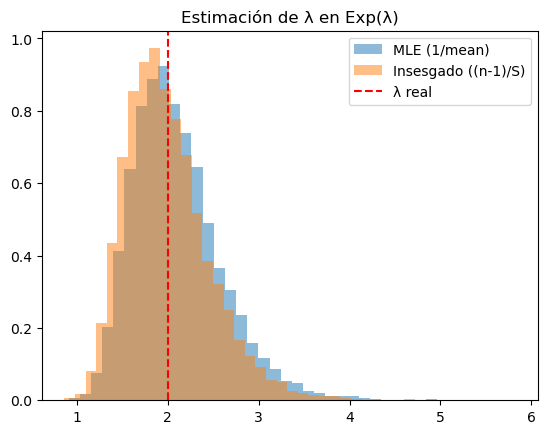

In [3]:
# ============================================
# Ejercicio 3: Exponencial (estimación de λ)
# ============================================

lam = 2.0   # parámetro verdadero
n = 20      # tamaño de muestra
Nsim = 10000

estimates_mle = []
estimates_unbiased = []

for _ in range(Nsim):
    sample = np.random.exponential(1/lam, n)
    # MLE = 1 / media muestral
    mle = 1 / np.mean(sample)
    estimates_mle.append(mle)
    # Estimador insesgado (corregido)
    unbiased = (n-1) / np.sum(sample)
    estimates_unbiased.append(unbiased)

estimates_mle = np.array(estimates_mle)
estimates_unbiased = np.array(estimates_unbiased)

print("λ real:", lam)
print("Media MLE:", np.mean(estimates_mle))
print("Media insesgado:", np.mean(estimates_unbiased))

plt.hist(estimates_mle, bins=40, density=True, alpha=0.5, label="MLE (1/mean)")
plt.hist(estimates_unbiased, bins=40, density=True, alpha=0.5, label="Insesgado ((n-1)/S)")
plt.axvline(lam, color="red", linestyle="dashed", label="λ real")
plt.title("Estimación de λ en Exp(λ)")
plt.legend()
plt.show()


# 2. Intervalos de Confianza

En la inferencia estadística, el objetivo principal no solo es estimar parámetros poblacionales, sino también **medir la incertidumbre** asociada a esas estimaciones.  
Un **intervalo de confianza (IC)** es una herramienta que permite dar una estimación por rangos, en lugar de un único valor puntual, proporcionando un margen de error y un nivel de confianza asociado.

De manera intuitiva, un intervalo de confianza responde a la pregunta:  

> *¿En qué rango de valores es razonable pensar que se encuentra el parámetro verdadero de la población, con cierto grado de confianza?*

Sea $(\theta)$ un parámetro poblacional y $(\hat{\theta})$ un estimador a partir de una muestra.  
Un **intervalo de confianza al nivel $((1-\alpha))$** para $(\theta)$ es un intervalo aleatorio de la forma:

$$
IC_{1-\alpha} = \left[ L(X_1, \dots, X_n),\ U(X_1, \dots, X_n) \right]
$$

tal que:

$$
P\left( L(X_1, \dots, X_n) \leq \theta \leq U(X_1, \dots, X_n) \right) = 1 - \alpha
$$

donde:
- $(1 - \alpha)$ = nivel de confianza (ejemplo: 95%).  
- $(\alpha)$ = nivel de significancia (ejemplo: 0.05).  
- $(L)$ y $(U)$ son funciones de la muestra que determinan los límites inferior y superior del intervalo.


Un intervalo de confianza del 95% **no significa** que haya un 95% de probabilidad de que $(\theta)$ esté dentro del intervalo.  
El parámetro es fijo (pero desconocido) y el intervalo es aleatorio porque depende de la muestra.  

La interpretación correcta es:  
> “Si repitiéramos el experimento muchas veces y construyéramos intervalos de confianza del 95% cada vez, aproximadamente el 95% de ellos contendría el valor verdadero del parámetro.”


## Intervalo de Confianza para la media de una distribución normal (σ conocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

### Nivel de significancia (error): $\alpha$

El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:

$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde
- $\sigma$ es la desviación estándar
- $\frac{\sigma}{\sqrt{n}}$ es el error estándar de la media
- $z_{\alpha/2}$ determina el nivel de confianza
- el intervalo está centrado en $\bar{X}$

**OBS** A mayor valor de $n$ -> menor error estándar -> el intervalo de confianza es más pequeño -> lo cual hace que se acerque más a la media, es decir, que haya menos variación.

**EJEMPLO 1** Para trata de estimar la media de consumo por cliente en un restaurante, se reunieron datos de una muestra de $49$ clientes durante tres semanas.

**a)** Supongamos que la **desviación estándar** de la población es de $\$2.5$. ¿Cuál es el error estándar de la media?

**b)** Con un nivel de confianza del $95\%$, ¿cuál es el margen de error?

**c)** Si la media de la muestra es de $\$22.60$ ¿cuál es el intervalo de confianza del $95\%$ para la media de la población? 

In [6]:
# Datos:
n = 49 
sigma = 2.5
media_muestral = 22.60
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
print(f"Eror estándar de la media: {error_estandar:.2f}")

# b) Margen de error
# 1-confianza= 0.05 => 0.025 en cada cola -> (1-confianza)/2

z = st.norm.ppf(1 - (1 - confianza) / 2) # ppf -> percentil point function
# z_{0.975} es tal que P(Z <= z_{0.975}) = 0.975
margen_error = z * error_estandar
print(f"Margen de error: {margen_error:.2f}")

# c) Intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error
print(f"Intervalo de confianza del {confianza*100}%: ({limite_inferior:.2f}, {limite_superior:.2f})")

Eror estándar de la media: 0.36
Margen de error: 0.70
Intervalo de confianza del 95.0%: (21.90, 23.30)


Por lo tanto, podemos decir que con un $95\%$ de confianza, se estima que el **consumo medio poblacional** está entre $\$21.90$ y $\$23.30$

**EJEMPLO 2** Un fabricante de focos asegura que la vida útil promedio de sus focos es de 1200 horas.  
Se toma una muestra aleatoria de tamaño $(n = 25)$, con una media muestral de $(\bar{X} = 1185)$ horas.  
La desviación estándar poblacional se conoce y es $(\sigma = 50)$ horas.  

Se desea calcular un intervalo de confianza al 95% para la media de la población.

**1. Datos conocidos:**

- $(n = 25)$  
- $(\bar{X} = 1185)$  
- $(\sigma = 50)$  
- Nivel de confianza: $(1-\alpha = 0.95 \implies \alpha = 0.05)$  
- Valor crítico: $(z_{0.025} = 1.96)$  


**2. Error estándar de la media:**

$$
SE = \frac{\sigma}{\sqrt{n}} = \frac{50}{\sqrt{25}} = \frac{50}{5} = 10
$$

**3. Intervalo de confianza:**

$$
IC_{0.95} = \left[ \bar{X} - z_{\alpha/2}\cdot SE,\ \bar{X} + z_{\alpha/2}\cdot SE \right]
$$

$$
IC_{0.95} = [1185 - 1.96(10),\ 1185 + 1.96(10)]
$$

$$
IC_{0.95} = [1165.4,\ 1204.6]
$$


Con un 95% de confianza, la vida útil promedio de los focos está entre **1165.4 y 1204.6 horas**.

In [7]:
# Datos del problema
n = 25
x_bar = 1185   # media muestral
sigma = 50     # desviación estándar poblacional conocida
conf = 0.95

# Valor crítico de la normal estándar
z = st.norm.ppf(1 - (1-conf)/2)

# Error estándar
SE = sigma / np.sqrt(n)

# Intervalo de confianza
IC_inf = x_bar - z * SE
IC_sup = x_bar + z * SE

print(f"Intervalo de confianza al 95%: [{IC_inf:.2f}, {IC_sup:.2f}]")

Intervalo de confianza al 95%: [1165.40, 1204.60]


**EJEMPLO 3** Supongamos que se toma una muestra aleatoria de 100 personas para estimar la media del peso de una población, y se obtiene que la media muestral es de $70$ kg con una desviación estándar que es conocida de $10$ kg. Para un nivel de confianza del $95\%$, calcular el intervalo de confianza.

In [8]:
# Datos:
n = 100
sigma = 10
media_muestral = 70 
confianza = 0.95    
error_estandar = sigma / np.sqrt(n)

# Vamos a utilizar la función scipy.stats.norm.interval
# Sintaxis: scipy.stats.norm.interval(confidence = confianza, loc=media_muestral, scale=error_estandar)

intervalo = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)

print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confianza del 95.0%: (68.04, 71.96)


## Intervalo de Confianza para la media $\mu$ de una distribución normal ($\sigma$ deconocida)

Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:

- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$

Si el tamaño de la muestra es menor a 30, se utiliza la $t$: 
### Estadístico t

Definimos el estadístico $t$ de la siguiente manera:
$$T = \frac{\bar{X}-\mu}{s/\sqrt{n}} \sim t_{(n-1)} $$

### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ desconocida) es:

$$
\left( \bar{X} - t_{\alpha/2} \frac{s}{\sqrt{n}}, \quad \bar{X} + t_{\alpha/2} \frac{s}{\sqrt{n}} \right)
$$
donde

- $s$ = desviación estándar muestral
- $\frac{s}{\sqrt{n}}$ = error estándar de la media  
- $t_{\alpha/2}$ determina el nivel de confianza  
- El intervalo está centrado en $\bar{X}$

**EJEMPLO 4** Supongamos que tenemos los soguientes datos de una muestra aleatoria de 10 observaciones:
$$ datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82] $$
Calcular un intervalo de confianza para la media.

In [9]:
# Datos 
datos = [45, 55, 67, 45, 68, 79, 98, 87, 84, 82]
n = len(datos)
confianza = 0.95
gl = n - 1

# Tenemos la media y el error estándar
media_muestral = np.mean(datos)
error_estandar = st.sem(datos) # std error of the mean utilizando la desviación estándar muestral

# Utilizamos la distribución t de Student
intervalo = st.t.interval(confianza, df=gl, loc=media_muestral, scale=error_estandar)
print(f"La media muestral es: {media_muestral:.2f}")
print(f"Intervalo de confianza del {confianza*100}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")


La media muestral es: 71.00
Intervalo de confianza del 95.0%: (58.00, 84.00)


**EJEMPLO 5** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.

La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8

**a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.

**b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [10]:
from scipy.stats import chi2
#Datos:
n = 100
media_muestral = 1750
desviacion_muestral = 315.8 # varianza muestral = 99,729.64
confianza = 0.90

# a) Se tiene que n>30, por lo que usamos la normal
error_estandar = desviacion_muestral / np.sqrt(n)
intervalo_media = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)
print(f"Intervalo de confianza para la media del {confianza*100}%: ({intervalo_media[0]:.2f}, {intervalo_media[1]:.2f})")

# b) Intervalo de confianza para la varianza
gl = n - 1
alpha = 1 - confianza   
s2 = desviacion_muestral**2

# Vamos a calcular los cuantiles de la distribución chi-cuadrado
chi2_inf = st.chi2.ppf(alpha / 2, df=gl)
chi2_sup = st.chi2.ppf(1 - alpha / 2, df=gl)
intervalo_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza[0]:.2f}, {intervalo_varianza[1]:.2f})")

# Otra forma de calcular el intervalo de confianza para la varianza
chi2_inf, chi2_sup = chi2.interval(confianza, df=gl)
intervalo_varianza2 = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza para la varianza del {confianza*100}%: ({intervalo_varianza2[0]:.2f}, {intervalo_varianza2[1]:.2f})")


Intervalo de confianza para la media del 90.0%: (1698.06, 1801.94)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)
Intervalo de confianza para la varianza del 90.0%: (80123.49, 128146.72)


**EJEMPLO 6**  Intervalo de Confianza para la Media con σ desconocida

Supongamos que se mide el contenido de azúcar (en gramos) de 16 muestras de un jugo.  
Los valores muestrales (en gramos) tienen una **media muestral** $(\bar{X} = 105)$ y una **desviación estándar muestral** $(S = 8)$.  

Se desea calcular un intervalo de confianza del 95% para la **media poblacional** $(\mu).$

**1. Datos conocidos:**

- Tamaño de la muestra: $(n = 16)$  
- Media muestral: $(\bar{X} = 105)$  
- Desviación estándar muestral: $(S = 8)$  
- Nivel de confianza: $(1 - \alpha = 0.95)$ 
- Grados de libertad: $(df = n - 1 = 15)$  
- Valor crítico: $(t_{\alpha/2, df} = t_{0.025,15} \approx 2.131)$ (de tablas t de Student)

**2. Error estándar de la media:**

$$
SE = \frac{S}{\sqrt{n}} = \frac{8}{\sqrt{16}} = \frac{8}{4} = 2
$$

**3. Intervalo de confianza:**

$$
IC_{0.95} = \left[ \bar{X} - t_{\alpha/2, df} \cdot SE,\ \bar{X} + t_{\alpha/2, df} \cdot SE \right]
$$

$$
IC_{0.95} = [105 - 2.131 \cdot 2,\ 105 + 2.131 \cdot 2]
$$

$$
IC_{0.95} = [100.738,\ 109.262]
$$

**4. Interpretación:**

Con un 95% de confianza, la media poblacional de contenido de azúcar está entre **100.74 g y 109.26 g**.


In [11]:
import numpy as np
import scipy.stats as st

# Datos del problema
n = 16
x_bar = 105
s = 8
conf = 0.95
df = n - 1

# Valor crítico t de Student
t_crit = st.t.ppf(1 - (1-conf)/2, df)

# Error estándar
SE = s / np.sqrt(n)

# Intervalo de confianza
IC_inf = x_bar - t_crit * SE
IC_sup = x_bar + t_crit * SE

print(f"Intervalo de confianza al 95% para μ: [{IC_inf:.2f}, {IC_sup:.2f}]")


Intervalo de confianza al 95% para μ: [100.74, 109.26]


## Conclusión

La inferencia estadística permite estimar parámetros poblacionales a partir de muestras, cuantificando la incertidumbre asociada.
Los estimadores, obtenidos por máxima verosimilitud o método de momentos, deben ser insesgados, consistentes y, cuando es posible, eficientes.
Los intervalos de confianza complementan estas estimaciones, proporcionando rangos plausibles para los parámetros con un nivel de certeza definido.
En conjunto, estas herramientas permiten tomar decisiones fundamentadas y evaluar la precisión de nuestras estimaciones en presencia de variabilidad muestral.
